# Table of Content

1. EDA 
2. Pediction 

# Import the data

In [116]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

df_train=pd.read_csv('data/train.csv')
df_test=pd.read_csv('data/test.csv')
sns.set()

browser the first lines of train data

In [117]:
#browser the first lines of train data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


browser first lines of test data

In [118]:
# browser first lines of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


display how many columns do we have

In [119]:
#display how many columns do we have
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

checking data had null value or not

In [120]:
#null value or not
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 summary statistics

In [121]:
#check out summary statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visual exploratory data analysis


How many people survived?

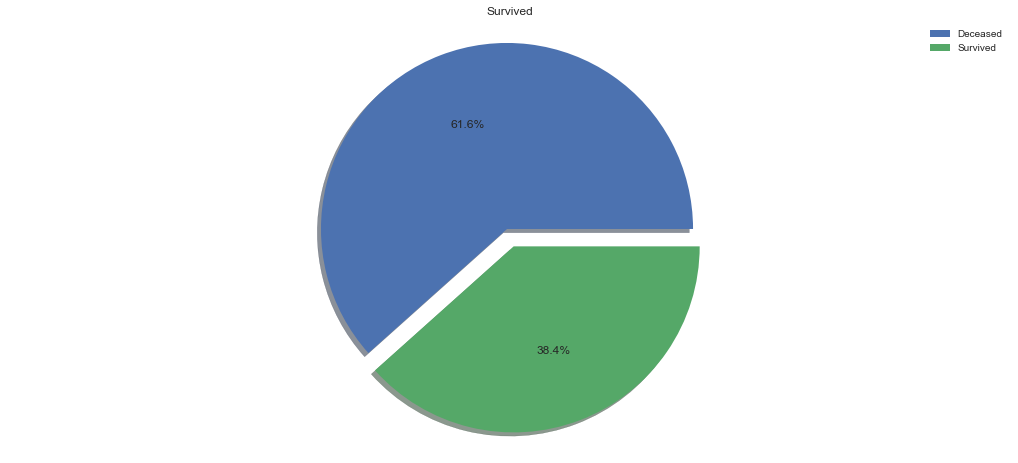

In [122]:
labels = ['Deceased','Survived']
fig,ax = plt.subplots(figsize=(18,8)) #figsize = size
ax.pie(df_train['Survived'].value_counts(), explode=[0,0.1],autopct='%1.1f%%',shadow=True) #autopc = auto percentage
ax.set_title('Survived')
plt.legend(labels, loc="best") #label
ax.axis('equal') #pie chart vertical 
plt.show()

Gender distribution of titanic

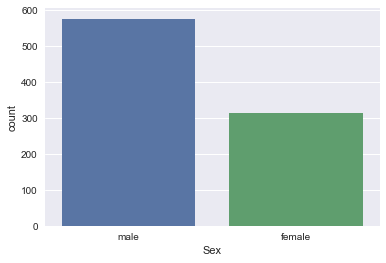

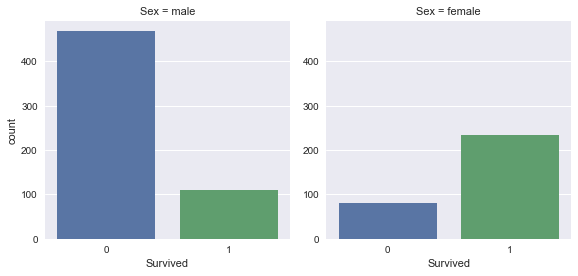

In [123]:
sns.countplot(x='Sex', data=df_train)
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);
#sns.factorplot(x='Pclass', col='Survived', kind='count', data=df_train);

Gender of the survivor

In [124]:
print(df_train.groupby(['Sex']).Survived.sum())

Sex
female    233
male      109
Name: Survived, dtype: int64


Precentage of the distribution

In [125]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.742038216561
0.188908145581


# Prediction of  survivor

Merge the train and test dataset together

In [126]:
# Store target variable of training data in a safe place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])


Fill in the data where missing in Fare and Age columns

In [127]:
# Impute missing numerical variables
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

# Check out info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


Extrcat the columns of Sex

In [108]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True )
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


Select the specify columns and start our first prediction

In [109]:
# Select columns and view head
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Sex_male    1309 non-null uint8
Fare        1309 non-null float64
Age         1309 non-null float64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


In [111]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]
X = data_train.values
test = data_test.values
y = survived_train.values

Import Decisions Tree for the prediction 

In [112]:
# Instantiate model and fit to data
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred

In [114]:
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/1st_dec_tree.csv', index=False)